#  🛳️ Titanic Survival Patterns: An EDA Approach
***“Exploring survival stories hidden beneath the numbers.”***

## Objective

Perform detailed exploratory data analysis (EDA) on the Titanic dataset to identify trends and patterns related to passenger survival. This involves examining missing values, understanding feature distributions, and analyzing relationships between variables using basic visualizations.

# Dataset Information
 - Source: Kaggle Titanic: Machine Learning from Disaster
 - Files Used: train.csv
 - Target Variable: Survived (0 = Did not survive, 1 = Survived)
 - Features:
 - Pclass (Passenger class)
 - Sex
 - Age
 - SibSp (Number of siblings/spouses aboard)
 - Parch (Number of parents/children aboard)
 - Fare
 - Embarked (Port from boarded)
#### Let's dive into the code and start with loading the dataset!

# Step 1: Import Required Libraries
We'll begin by importing essential Python libraries for data analysis and visualization.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid')
%matplotlib inline

# Step 2: Load the Dataset
We’ll use the training dataset from the Titanic - Machine Learning from Disaster challenge on Kaggle.

In [7]:
# Load the dataset
df = pd.read_csv('titanic.csv') # We begin by loading the Titanic dataset into a pandas DataFrame.

# Step 3: Basic Data Exploration
We will check the dataset's shape, data types, and get a basic statistical summary.

In [9]:
print("Shape of dataset:", df.shape)  # Shows Shape of dataset

Shape of dataset: (891, 12)


In [10]:
df.head() # Shows the first 5 rows by default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.tail() # Shows the bottom 5 rows by default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Step 4: Data Overview
We’ll examine the dataset’s structure, including number of entries, data types, and missing values.

In [13]:
# Basic info and missing values
df.info() # Quick Overview of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull() # Checks for Missing Values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum() #Count Missing Values Per Column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- It is clear to see that there is 177 missing values in the Age feature and the 2 values are missing in the Embarked.

In [17]:
# Summary statistics
df.describe() #Descriptive Statistics at a Glance for all numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.describe(include='object') #Summary Stats for Categorical(text/string) Columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Step 5: Visualize Missing Values- Heatmap
Let’s visualize where data is missing to guide our cleaning strategy.

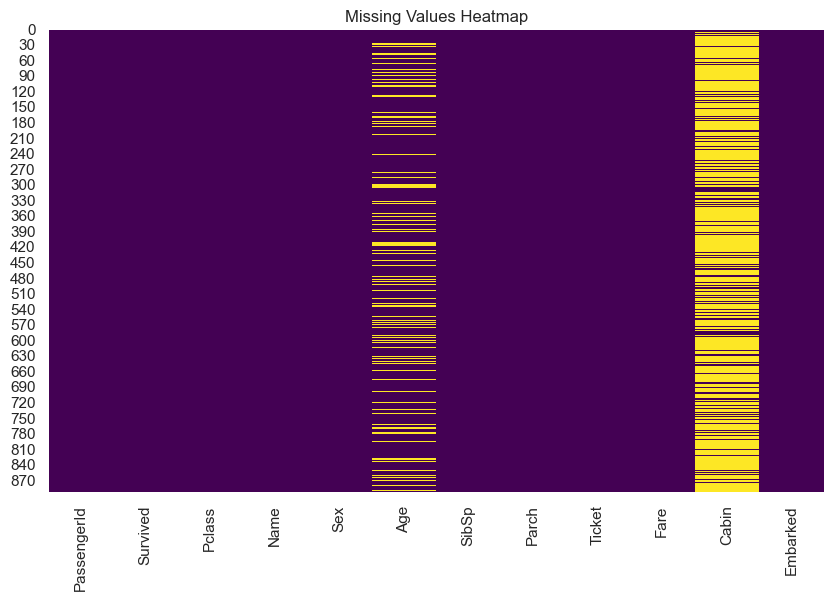

In [20]:
#creates a heatmap to visually inspect missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  
plt.title("Missing Values Heatmap")
plt.show()

# Step 6: Univariate Analysis

### Numerical Features:

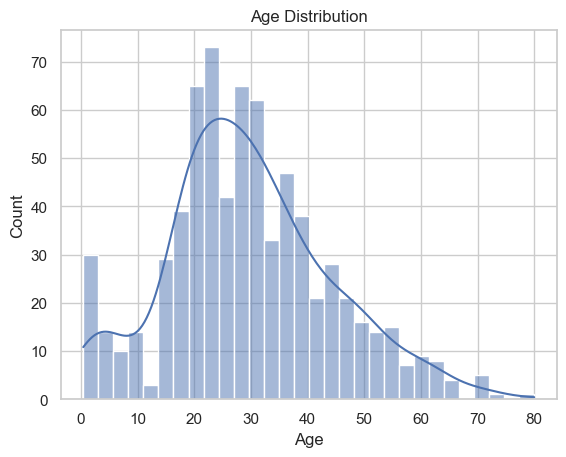

In [23]:
# Numerical Features - Age
sns.histplot(df['Age'].dropna(), kde=True, bins=30)  #creates a histogram of Age distribution
plt.title("Age Distribution")
plt.show() 

 - Most passengers were in their 20s and 30s. The distribution is right-skewed with fewer older passengers.

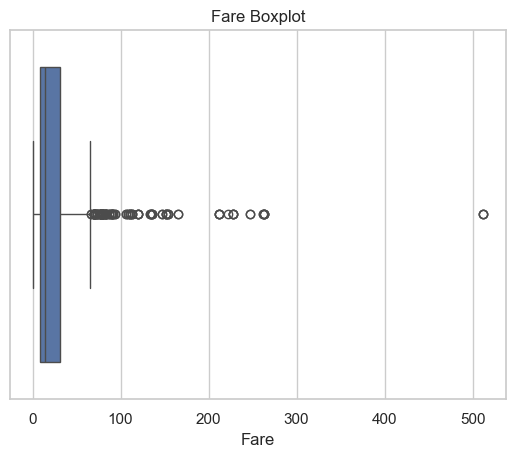

In [25]:
# Numerical Features - Fare
sns.boxplot(x=df['Fare']) # Spot outliers
plt.title("Fare Boxplot")
plt.show()

 - Most fares are concentrated under $100, with a few high-value outliers.

### Categorical Features:

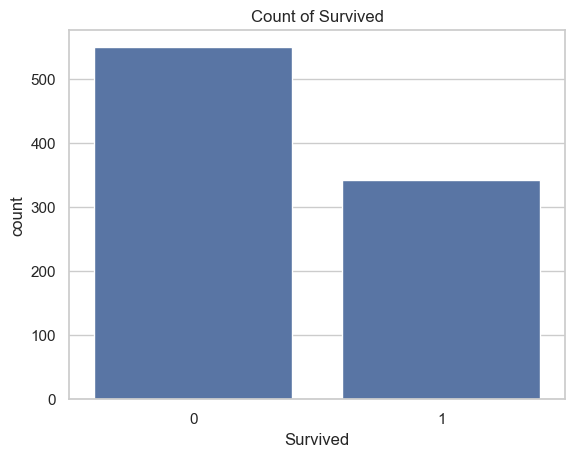

In [28]:
# Categorical Features - Survived
sns.countplot(x='Survived', data=df) #creates a bar chart for Survived count
plt.title("Count of Survived")
plt.show()

 - Survival Count: More people died (0) than survived (1)

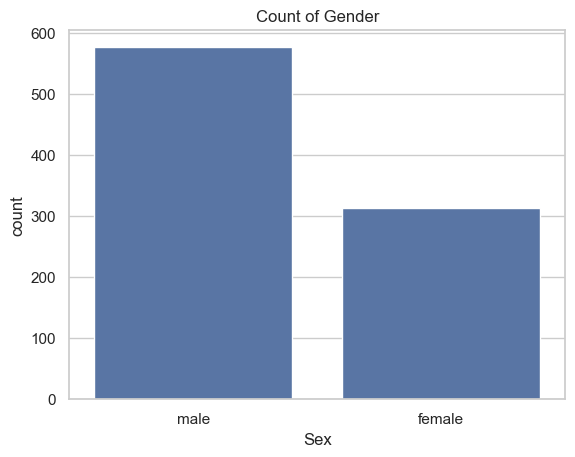

In [30]:
# Categorical Features - Sex
sns.countplot(x='Sex', data=df)
plt.title("Count of Gender")
plt.show()

 - More males than females on board.

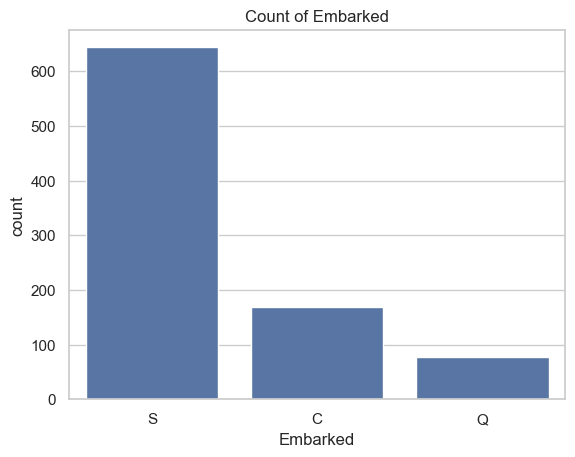

In [32]:
# Categorical Features - Embarked
sns.countplot(x='Embarked', data=df)
plt.title("Count of Embarked")
plt.show()

 - Most passengers boarded from port 'S' (Southampton).

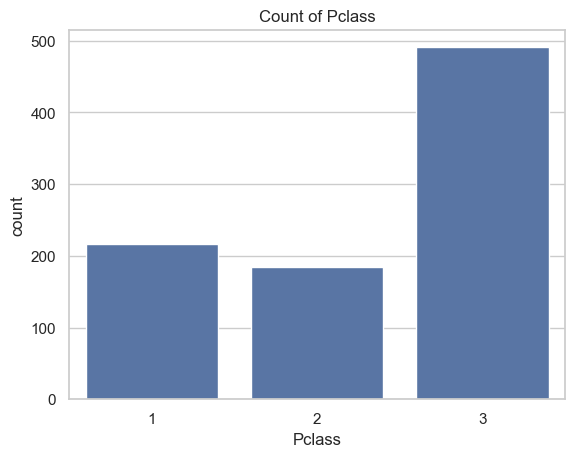

In [34]:
# Categorical Features - Pclass
sns.countplot(x='Pclass', data=df)  #creates a bar chart for Class distribution
plt.title("Count of Pclass")
plt.show()

 - Pclass: Most passengers were in 3rd class.

# Step 7: Bivariate Analysis

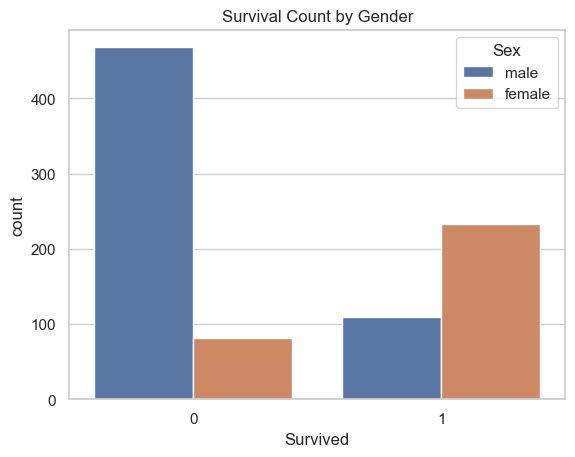

In [37]:
# Bivariate Analysis
# Survival Count by Gender
sns.countplot(x='Survived', hue='Sex', data=df)  #creates a count plot of Survival by gender
plt.title('Survival Count by Gender')
plt.show()

 - Females had a significantly higher survival rate than males.

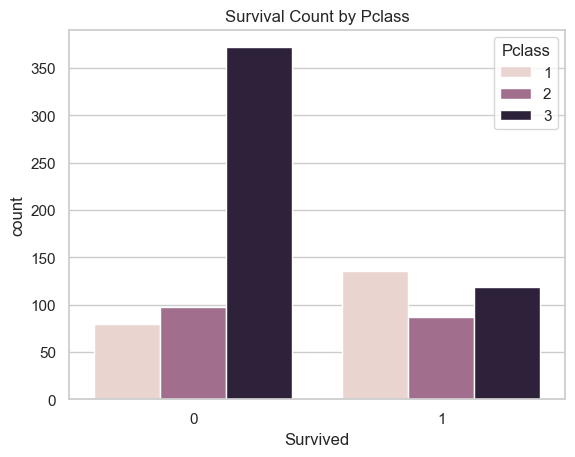

In [39]:
# Survival Count by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)  #creates a count plot of Survival by class
plt.title("Survival Count by Pclass")
plt.show()

 - 1st class passengers had better survival rates compared to 2nd and 3rd classes.

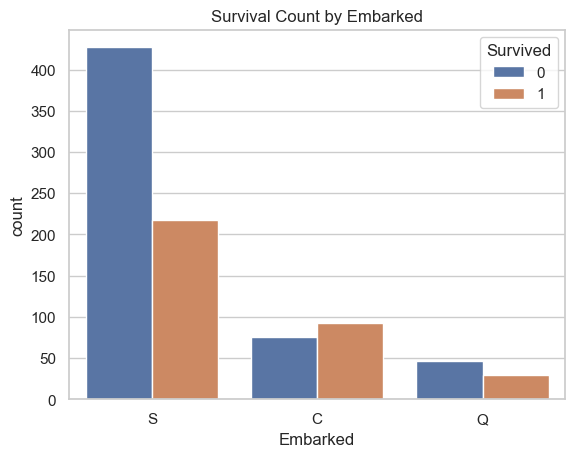

In [41]:
# Survival Count by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)  #creates a count plot of Survival by Embarked port
plt.title("Survival Count by Embarked")
plt.show()

 -  Passengers who embarked from port 'C' had a higher survival rate.

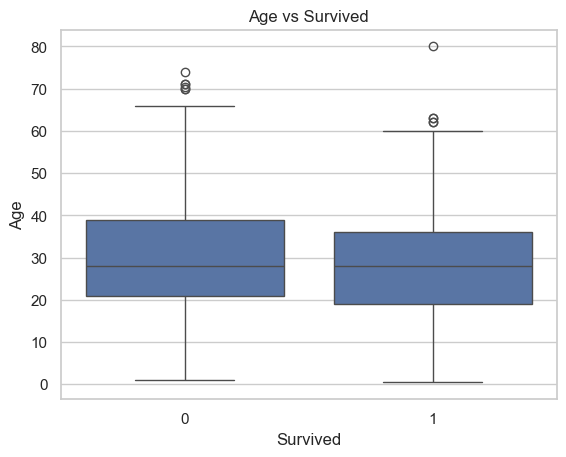

In [43]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)  # Box plot of Survival by Age
plt.title('Age vs Survived')
plt.show()

 - Survivors had slightly lower average age than non-survivors. Some children survived more.

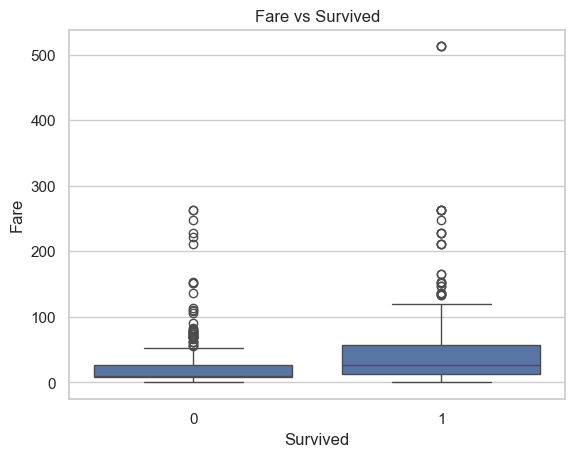

In [45]:
# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survived")
plt.show()

 - Survivors generally paid higher fares, suggesting more from higher classes survived.

## Step 8: Multivariate Analysis- Correlation Heatmap

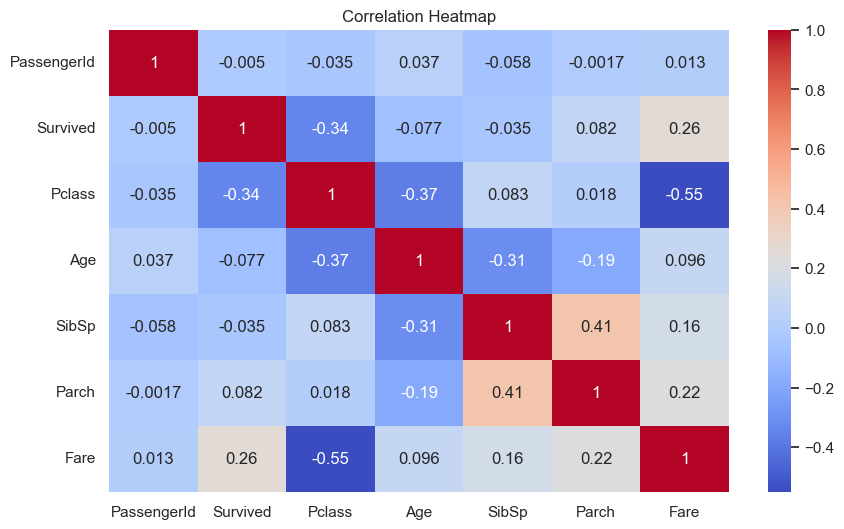

In [48]:
# Correlation Heatmap for Numerical Features
corr = df.corr(numeric_only=True) # Calculate correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm') # Plot heatmap
plt.title("Correlation Heatmap")
plt.show()

 - Fare and Survived show moderate positive correlation (~0.26), indicating passengers who paid higher fares were more likely to survive.  
 - Pclass and Fare have moderate negative correlation (~ -0.55), meaning higher class (lower number) generally paid more.  
 - Age and Survived show a slight negative correlation (~ -0.08), suggesting younger passengers had slightly better chances of survival.

## Step 9: Data Cleaning - Handling Missing Values
The dataset has missing values in the Age, Cabin, and Embarked columns. Here's how we'll handle them:

 - **Drop Cabin** since it's mostly missing and not that informative.
 - **Fill missing Age** with the median age.
 - **Fill missing Embarked** with the most frequent value (mode).

In [51]:
# Drop Cabin since it's mostly missing
df.drop(columns='Cabin', inplace=True)

# Replace missing Age with median — the safe way
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replace missing Embarked with mode — the safe way
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Final check for missing values
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Step 10: Feature Engineering: Create Age Groups

In [53]:
# Create Age Groups from Age for better interpretability and modeling
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], 
                        labels=['Child','Teen','Young Adult','Adult','Senior'])

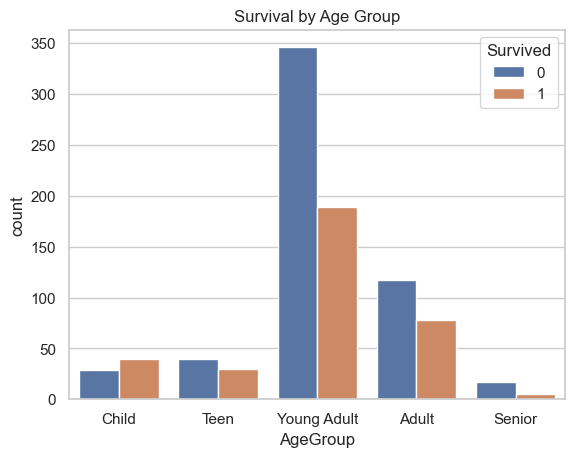

In [54]:
# Bivariate analysis to see how AgeGroup relates to survival
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival by Age Group")
plt.show()

 - Children had the highest survival rate among all age groups.

# Insights
Through this EDA, we observed:

 - Females had a significantly higher survival rate than males
 - Higher-class passengers (Pclass 1) were more likely to survive
 - Fare and Age distributions suggest survival advantages for higher-paying and younger passengers (especially children), though age correlation is weaker.
 - Sex, Pclass, and Fare are strong predictors of survival. Fare shows moderate positive correlation with Survived.

# Recommendations

#### For Future Passenger Safety on Ships:
 - Ensure equal access to lifeboats for all passengers, regardless of class.
 - Conduct mandatory lifeboat training for all passengers.
 - Develop special evacuation protocols for large families.
   
#### For the Travel & Cruise Industry:
 - Safety procedures should be class-independent.
 - Provide dedicated assistance for elderly and solo travelers.
 - Implement better crowd management for efficient evacuations.

##### End of EDA